<a href="https://colab.research.google.com/github/yaswanthkumargothi/Barcode_Detection/blob/main/bbox_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob2
import imutils
import cv2
import os

from google.colab.patches import cv2_imshow
from pathlib import Path
from tqdm import tqdm
import shutil



In [ ]:
path = "/content/drive/MyDrive/1d_barcode_extended_plain/Detection"

In [ ]:
all_images = glob2.glob(path+'/*.png')
train_images=all_images[:int(len(all_images)*0.8)]
val_images=all_images[int(len(all_images)*0.8):]

In [ ]:
txt_files_path = "/content/drive/MyDrive/1d_barcode_extended_plain"

In [ ]:
train_path=txt_files_path + "/train.txt"
dirpath = Path(f"{train_path}")
if dirpath.exists() and dirpath.is_dir():
  shutil.rmtree(dirpath)


val_path = txt_files_path + "/val.txt"
dirpath = Path(f"{val_path}")
if dirpath.exists() and dirpath.is_dir():
  shutil.rmtree(dirpath)


with open(txt_files_path + "/train.txt", "w") as txt_file:
        for item in train_images:
          
          label_name = os.path.basename(item)
          img_txt='data/images/'+label_name
          txt_file.write("%s\n" % img_txt)

with open(txt_files_path+"/val.txt",mode="w") as txt_file:
        for item in val_images:
          label_name = os.path.basename(item)
          img_txt='data/images/'+label_name
          txt_file.write("%s\n" % img_txt)

In [ ]:
print(os.path.splitext(m)[0])

05102009140


In [ ]:
def create_dataset(dataset_type,dataset):
    # load the image, convert it to grayscale, and blur it slightly
    lab_path=Path(f"/content/drive/MyDrive/1d_barcode_extended_plain/labels/{dataset_type}")
      
    dirpath = lab_path
    if dirpath.exists() and dirpath.is_dir():
      shutil.rmtree(dirpath)

    for img_id in tqdm(dataset):

      image = cv2.imread(img_id)
      row,col,chan=image.shape
      gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      gray = cv2.GaussianBlur(gray, (5, 5), 0)
      # threshold the image,
      thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)[1]
      # find contours in thresholded image, then grab the largest
      # one
      cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
          cv2.CHAIN_APPROX_SIMPLE)
      cnts = imutils.grab_contours(cnts)
      c = max(cnts, key=cv2.contourArea)
      x,y,w,h = cv2.boundingRect(c)
      
      yolo_x,yolo_y,yolo_w,yolo_h=(x+w/2)/col,(y-h/2)/row,w/col,h/row
      # draw the contours of c
      #cv2.drawContours(image, [c], -1, (0, 0, 255), 2)

      cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)


      # show the output image
      #cv2_imshow(image)
      #cv2.waitKey(0)

      labels_path = Path(f"/content/drive/MyDrive/1d_barcode_extended_plain/labels/{dataset_type}")

      labels_path.mkdir(parents=True, exist_ok=True)
      
      m= os.path.basename(img_id)
      label_name = f"{os.path.splitext(m)[0]}.txt"
      with (labels_path / label_name).open(mode="w") as label_file:
        label_file.write(
                  f"{0} {yolo_x} {yolo_y} {yolo_w} {yolo_h}\n"
                )
      

In [ ]:
create_dataset('train',train_images)

100%|██████████| 292/292 [00:05<00:00, 57.91it/s]


In [ ]:
create_dataset('val',val_images)

100%|██████████| 73/73 [00:18<00:00,  3.94it/s]


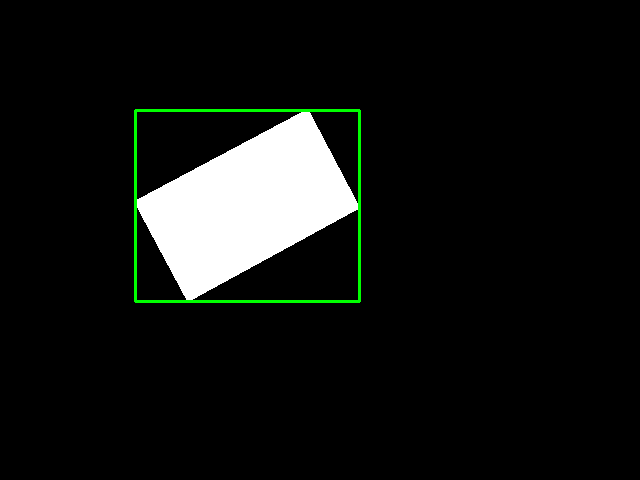

-1

In [ ]:
image = cv2.imread("/content/drive/MyDrive/1d_barcode_extended_plain/Detection/05102009082.png")
[row,col]=image.shape[:2]
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
      # threshold the image,
thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)[1]
      # find contours in thresholded image, then grab the largest
      # one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
          cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)
x,y,w,h = cv2.boundingRect(c)
      
yolo_x,yolo_y,yolo_w,yolo_h=(x+w/2)/col,(y-h/2)/row,w/col,h/row
      # draw the contours of c
      #cv2.drawContours(image, [c], -1, (0, 0, 255), 2)
cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)


      # show the output image
cv2_imshow(image)
cv2.waitKey(0)
